In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
#import logging

In [2]:
#logging.basicConfig(filename='run.log', level=logging.DEBUG)
#logging.basicConfig(format='%(asctime)s %(message)s')
#logging.info('Starting')


In [3]:
df = pd.read_csv("../data/7282_1.csv",sep=",") 
df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [4]:
df.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object

In [5]:
df.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [6]:
df['reviews.rating'].plot(kind='hist', bins=10)

In [7]:
Review_freq = df['name'].value_counts()

In [8]:
pd.DataFrame(Review_freq[Review_freq >= 5])

,name
"The Alexandrian, Autograph Collection",1185
Howard Johnson Inn - Newburgh,714
Americas Best Value Inn,567
Fiesta Inn and Suites,546
Ip Casino Resort Spa,392
Best Western Plus Waterville Grand Hotel,335
Hampton Inn Virginia Beach Oceanfront North,334
Comfort Suites,326
New York Marriott Marquis,320
Best Western of Long Beach,317


In [9]:
df = df[df['name'].isin(Review_freq[Review_freq >= 10].index)]
df.size

668135

In [10]:
df = df[df['reviews.username'] != 'write a review']
df.size

666786

In [11]:
df = df[df['reviews.rating'] <= 5]

In [12]:
df = df[df['reviews.text'].isna() == False]

In [13]:

#df = df.head(100)

In [14]:
df = df.reset_index(drop=True)
df['index'] = df.index


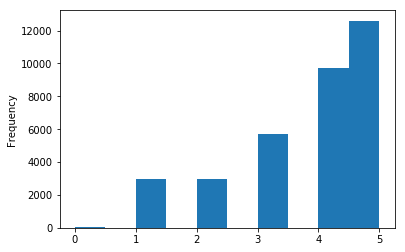

In [15]:
df['reviews.rating'].plot(kind='hist', bins=10)

In [16]:
def SentimenAnalysis(text):
# Function that receive the text and return:
# sentimento polarity
# sentimento subjectivity
# Key Verbs 
    #print(">" + text)
    
    
    
    #variables initialization
    fix = 0
    clear = 0 
    enhance = 0
    change =0
    improve = 0
    remove = 0
    recommend = 0
    like = 0
    love = 0
    enjoy = 0
    
    sentiment_polarity = 0
    sentiment_subjectivity = 0
    
    text = text.replace('\"','').replace('.','')
    blob = TextBlob(text.lower())
    
    #print(">" + text)
    
    #Sentiment classification
    try:
        try:
            blob = blob.translate(to='en')
        except:
            pass #do nothing  
        
        sentiment_polarity = blob.sentiment[0]
        sentiment_subjectivity = blob.sentiment[1]        
    except:        
        sentiment_polarity = 999
        sentiment_subjectivity = 999
    
    
    #Key verbs analysis
    try:
        for word,pos in blob.tags:
            if pos in ('VB'):#,'VBZ','VBP','VBD','VBN','VBG'):
                lemma = word.lemmatize("v")
                #print(lemma)
                if lemma == "fix": fix = 1 
                if lemma == "clear": clear = 1
                if lemma == "enhance": enhance = 1
                if lemma == "change:": change = 1
                if lemma == "improve": improve = 1
                if lemma == "remove":  remove = 1
                if lemma == "recommend": recommend = 1
                if lemma == "like": like = 1
                if lemma == "love": love = 1
                if lemma == "enjoy": enjoy = 1

    except:
        pass #do nothing  
        

    
    #Return the results    
    return sentiment_polarity,sentiment_subjectivity,fix,clear,enhance,change,improve,remove,recommend,like,love,enjoy 
    

In [17]:
df.shape[0]

34040

In [18]:

header = ['sentiment_polarity','sentiment_subjectivity','fix','clear','enhance','change','improve','remove','recommend','like','love','enjoy']
df2 = (df['reviews.title']+ " " + df['reviews.text']).apply(lambda x: SentimenAnalysis(str(x)))
df2.shape[0]


34040

In [19]:
y=[]

for i in df2:
    y.append(i)
    
df2 = pd.DataFrame(y,columns = header)
df2['index'] = df2.index


In [20]:
df3 = pd.merge(df,df2, on='index',how='left')

In [21]:
df3 = df3[df3['sentiment_polarity'].isnull() == False]
df3 = df3[df3['reviews.rating'].isnull() == False]

In [22]:
from sklearn import preprocessing

def MinMaxScale(df,feature):
    try:
        scaler = preprocessing.MinMaxScaler()
        df[feature] = scaler.fit_transform(df[[feature]])#.apply(lambda x: round(x,3)))
    except:
        print('Fail in Normalization '+ feature)  
    return df

df3 = pd.DataFrame(MinMaxScale(df3,'sentiment_polarity'))

df3 = pd.DataFrame(MinMaxScale(df3,'reviews.rating'))




In [23]:
df3.to_csv('../data/HotelReview.csv', encoding='utf-8', sep='|',index=False)

In [24]:
df3.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,...,fix,clear,enhance,change,improve,remove,recommend,like,love,enjoy
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
